# Gradient Descent

In [1]:
import torch
import torch.nn.functional as F
from IPython.display import Image

In [4]:
# 나는 구하는값이 target value가 되도록 만들기원함
# y 값 = target
target = torch.FloatTensor([[.1, .2, .3],
                            [.4, .5, .6],
                            [.7, .8, .9]])
# 나는 구하는값이 target value가 되도록 만들고 싶다.

In [7]:
x = torch.rand_like(target) 

#Target안에서의 숫자로 랜덤으로 행렬을 만듬

x.requires_grad = True 

# 애를 미분할거라고 선언

x

tensor([[0.0510, 0.3624, 0.8385],
        [0.6158, 0.3782, 0.7115],
        [0.5773, 0.3159, 0.9351]], requires_grad=True)

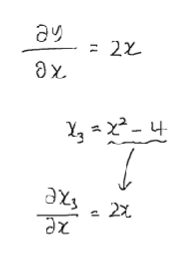

In [8]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\51.png")

In [12]:
loss = F.mse_loss(x, target) # 그래서 우리가 할거는 x를 업데이트 시킬거임
#실제 Loss값을 구한다
loss
#현재 x값에서 Loss는 0.2058

tensor(0.0715, grad_fn=<MseLossBackward0>)

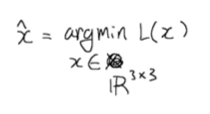

In [13]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\52.png")

우리는 x가 점점 target에 가까워질수록 이 요소도 작아짐. 우리는 Loss가 최소를 구하고 싶음 

In [14]:
threshold = 1e-5 #Loss가 10 의 마이너스 5승보다 작을경우에는 멈춘다고 설정
learning_rate = 1. ##Learning rate 는 1로 설정
iter_cnt = 0 #iteration count는 초기화해줌

while loss > threshold: #Loss가 threshold보다 클동안 계속 도는것. 작아지면 지가 알아서 탈출
    iter_cnt += 1
    
    loss.backward() #이미 위에서 구한 Loss라는 스칼라 값을 미분한다. 

    x = x - learning_rate * x.grad # 그러면 x.grad가 만들어지고 그 안에 3X3 의 어떤 값이 저장된다. 
    
    # You don't need to aware this now.
    x.detach_() ## 미분했을때 상관이 없어지라고 Xt와 Xt+1를 detach

    x.requires_grad_(True) 
    
    loss = F.mse_loss(x, target) # # 새로 업데이트된 x와 x_hat의 차이구하기 
    
    print('%d-th Loss: %.4e' % (iter_cnt, loss)) #그리고 loss가 얼마나 바뀌었는지 찍어준다
    print(x)
    
#그래서 loss > threshold보다 클동안 이 loss가 다시 미분되고 x.grad가 업데이트되고 detach하고 다시 loss구하고 이게 반복된다. 
#그래서 우리가 하고자 하는것은 x를 minimize하는 어떤x를 구하고싶은거

1-th Loss: 4.3229e-02
tensor([[0.0619, 0.3263, 0.7188],
        [0.5678, 0.4053, 0.6867],
        [0.6046, 0.4235, 0.9273]], requires_grad=True)
2-th Loss: 2.6151e-02
tensor([[0.0703, 0.2983, 0.6257],
        [0.5305, 0.4263, 0.6675],
        [0.6258, 0.5072, 0.9213]], requires_grad=True)
3-th Loss: 1.5820e-02
tensor([[0.0769, 0.2764, 0.5533],
        [0.5015, 0.4427, 0.6525],
        [0.6423, 0.5723, 0.9165]], requires_grad=True)
4-th Loss: 9.5699e-03
tensor([[0.0821, 0.2594, 0.4970],
        [0.4790, 0.4554, 0.6408],
        [0.6551, 0.6229, 0.9129]], requires_grad=True)
5-th Loss: 5.7892e-03
tensor([[0.0860, 0.2462, 0.4533],
        [0.4614, 0.4653, 0.6317],
        [0.6651, 0.6622, 0.9100]], requires_grad=True)
6-th Loss: 3.5021e-03
tensor([[0.0891, 0.2360, 0.4192],
        [0.4478, 0.4730, 0.6247],
        [0.6728, 0.6928, 0.9078]], requires_grad=True)
7-th Loss: 2.1186e-03
tensor([[0.0916, 0.2280, 0.3927],
        [0.4372, 0.4790, 0.6192],
        [0.6789, 0.7167, 0.9060]], requi

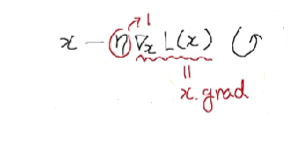

In [10]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\53.png")

x - learning_rate * x.grad

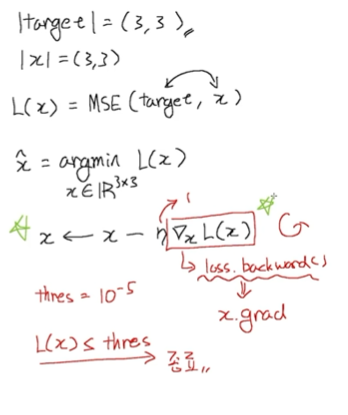

In [15]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\55.png")

#### 정리

Gradient Descent는 어떤 함수가 주어졌을때 그 함수를 최소화하는 입력을 찾아내는것

Target 사이즈는 (3,3)이었고
|x| = (3,3) 이었는데
Loss의 입력값은 x일때 
Loss(x) = MSE(x, target)
우리가 하고싶은건 x를 찾고싶은데 x는 실제 3X3의 집합의 사이즈이고 그중에서 L(x)를 minimize 하는 x값을 찾고싶은거다. 그럼 당연히 MSE함수에 의해서 우리는 target값에 가까워질것이다. 그래서 x를 업데이트 하면 되는데 업데이트 수식이 x - Learning rate X L(x)미분.
그래서 업데이트를 반복하는데 thresehold가 Loss보다 작거나 같은경우에 멈춘다.그럼 target값과 x값이 비슷하게 나온 결과를 얻을수있다. 